In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [3]:
# nr of words to consider as features
max_features = 10000
# cuts off texts aafter this many words(among the max_features most common words)
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')

# training and evaluating a bidirectional LSTM
input_train = [x[::-1] for x in input_train]
input_test = [x[::-1] for x in input_test]

print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequence
25000 test sequence
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimozer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 483us/sample - loss: 0.5211 - acc: 0.7414 - val_loss: 0.4854 - val_acc: 0.7698
Epoch 2/10
20000/20000 [==============================] - 7s 349us/sample - loss: 0.3284 - acc: 0.8734 - val_loss: 0.4477 - val_acc: 0.7980
Epoch 3/10
20000/20000 [==============================] - 7s 348us/sample - loss: 0.2620 - acc: 0.9042 - val_loss: 0.3355 - val_acc: 0.8774
Epoch 4/10
20000/20000 [==============================] - 7s 347us/sample - loss: 0.2282 - acc: 0.9198 - val_loss: 0.3039 - val_acc: 0.8834
Epoch 5/10
20000/20000 [==============================] - 7s 352us/sample - loss: 0.2050 - acc: 0.9276 - val_loss: 0.3635 - val_acc: 0.8496
Epoch 6/10
20000/20000 [==============================] - 7s 348us/sample - loss: 0.1813 - acc: 0.9359 - val_loss: 0.3310 - val_acc: 0.8720
Epoch 7/10
20000/20000 [==============================] - 7s 349us/sample - loss: 0.1601 - acc: 0.9440 - val_l

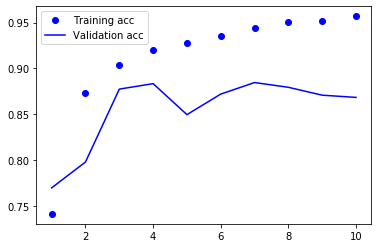

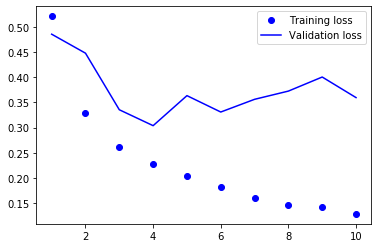

In [5]:
# plotting the result
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [6]:
# training a bidirectional GRU
from tensorflow.keras.layers import Bidirectional, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 861us/sample - loss: 0.5491 - acc: 0.7283 - val_loss: 0.3924 - val_acc: 0.8490
Epoch 2/10
20000/20000 [==============================] - 14s 694us/sample - loss: 0.3745 - acc: 0.8566 - val_loss: 0.3614 - val_acc: 0.8520
Epoch 3/10
20000/20000 [==============================] - 14s 692us/sample - loss: 0.2798 - acc: 0.8939 - val_loss: 0.4608 - val_acc: 0.7946
Epoch 4/10
20000/20000 [==============================] - 14s 695us/sample - loss: 0.2377 - acc: 0.9136 - val_loss: 0.4651 - val_acc: 0.8620
Epoch 5/10
20000/20000 [==============================] - 14s 693us/sample - loss: 0.2074 - acc: 0.9272 - val_loss: 0.4202 - val_acc: 0.8458
Epoch 6/10
20000/20000 [==============================] - 14s 700us/sample - loss: 0.1882 - acc: 0.9330 - val_loss: 0.3148 - val_acc: 0.8824
Epoch 7/10
20000/20000 [==============================] - 14s 693us/sample - loss: 0.1613 - acc: 0.9439 -

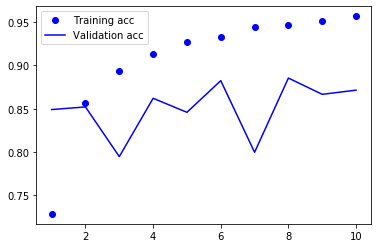

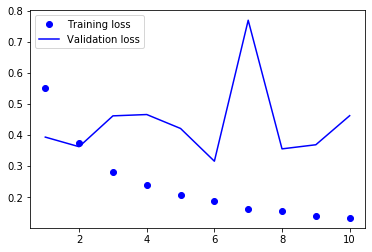

In [7]:
# plotting the result
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()